# Avacado Project
Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

Your task is to make a mode that can consider the data provided and predict the Average Price.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [3]:
from sklearn.metrics import accuracy_score

# Loading the dataset

In [4]:
df=pd.read_csv('avocado.csv')


In [5]:
#preview dataset
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [7]:
# shape of dataset
df.shape

(18249, 14)

In [8]:
# metadata - datatypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [9]:
# metadata - statstical data
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [10]:
# check for missing values
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [11]:
#This Unnamed: 0 is of no importance for determining the average price, So we will remove it
del df['Unnamed: 0']

In [12]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [14]:
#lets check the datatype of date column
type(df["Date"][0])

str

In [15]:

df['Date']=pd.to_datetime(df['Date'])

In [16]:
#lets check the datatype of date column again
type(df["Date"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [17]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [18]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [19]:

df.rename(columns={"4046" : "Small Hass", "4225" : "Large Hass","4770" : "XLarge Hass" },inplace=True)

In [20]:
df

,Date,AveragePrice,Total Volume,Small Hass,Large Hass,XLarge Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [21]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [22]:
regionsToRemove = ['California', 'GreatLakes', 'Midsouth', 'NewYork', 'Northeast', 'SouthCarolina', 'Plains', 'SouthCentral', 'Southeast', 'TotalUS', 'West']
df = df[~df.region.isin(regionsToRemove)]
len(df.region.unique())

43

In [23]:
df.shape

(14531, 13)

In [24]:
df['year'].value_counts()

2017    4556
2016    4472
2015    4471
2018    1032
Name: year, dtype: int64

<AxesSubplot:xlabel='year', ylabel='count'>

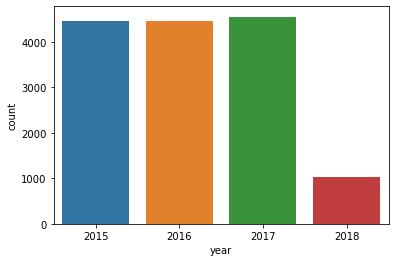

In [25]:
sns.countplot(x='year',data=df)

<AxesSubplot:xlabel='year', ylabel='count'>

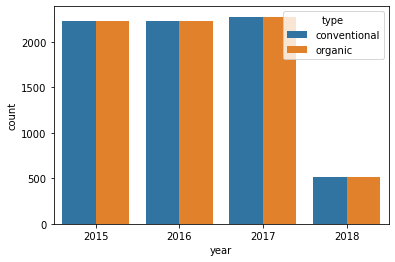

In [23]:
#lets check the sale year wise with hue as type of avacado
sns.countplot(x='year',hue='type',data=df)

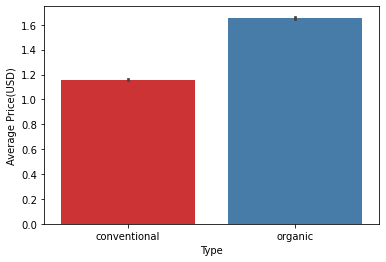

In [24]:
sns.barplot(x='type',y='AveragePrice',data=df,palette='Set1')
plt.xlabel('Type')
plt.ylabel('Average Price(USD)')
plt.show()

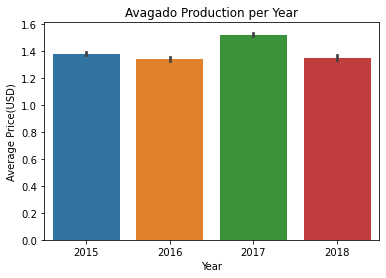

In [25]:
sns.barplot(x='year',y='AveragePrice',data=df)
plt.xlabel('Year')
plt.ylabel('Average Price(USD)')
plt.title('Avagado Production per Year')
plt.show()


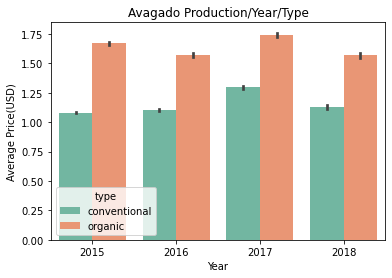

In [26]:
sns.barplot(x='year',y='AveragePrice',hue='type',data=df,palette='Set2')
plt.xlabel('Year')
plt.ylabel('Average Price(USD)')
plt.title('Avagado Production/Year/Type')
plt.show()

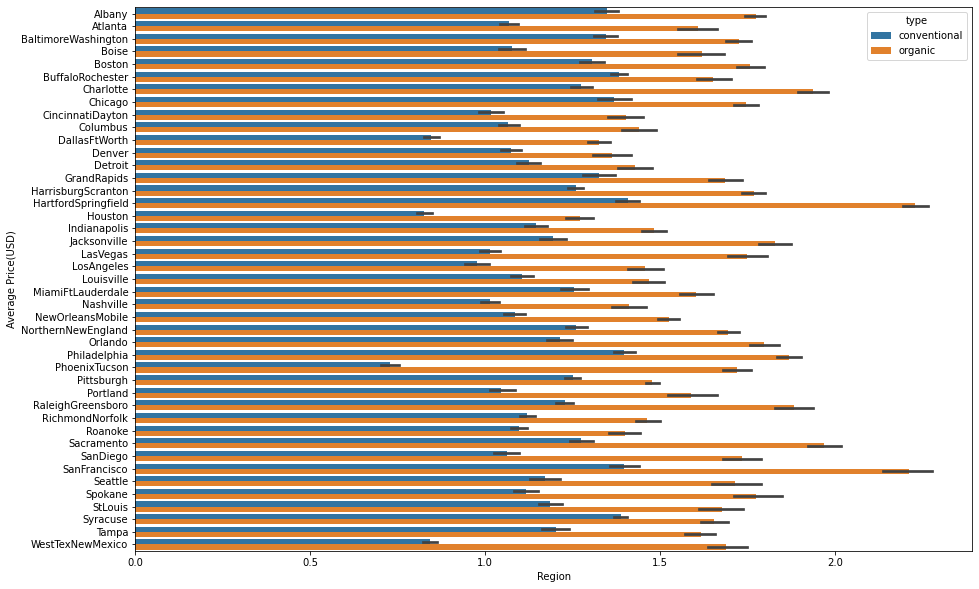

In [27]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['AveragePrice'],y=df['region'],hue='type',data=df)

plt.xlabel('Region')
plt.ylabel('Average Price(USD)')
plt.show()

<AxesSubplot:xlabel='count', ylabel='region'>

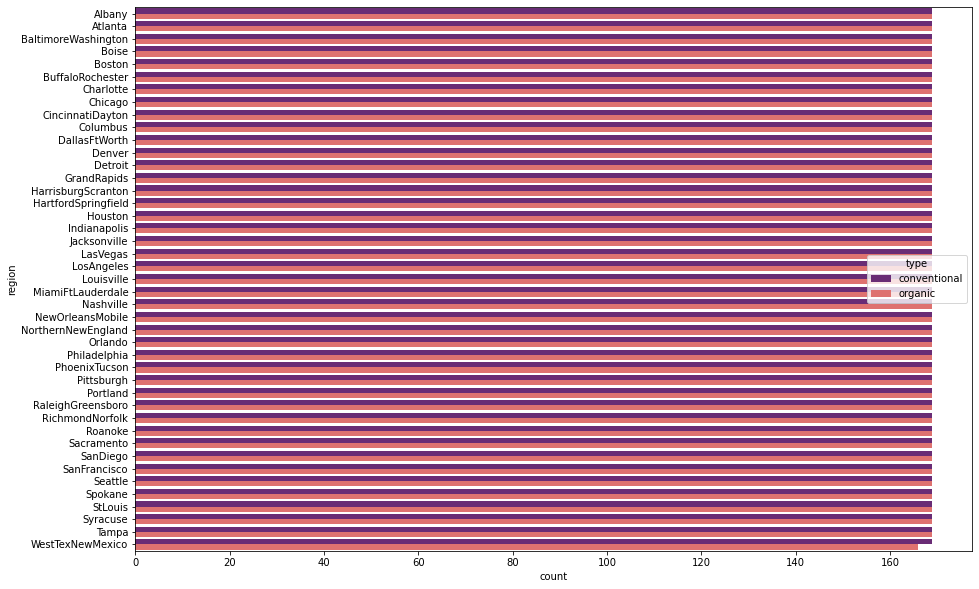

In [28]:
plt.figure(figsize=(15,10))
sns.countplot(y='region', hue='type',data=df,palette='magma')

<AxesSubplot:title={'center':'Conventional Avagado Production/Year'}, ylabel='year'>

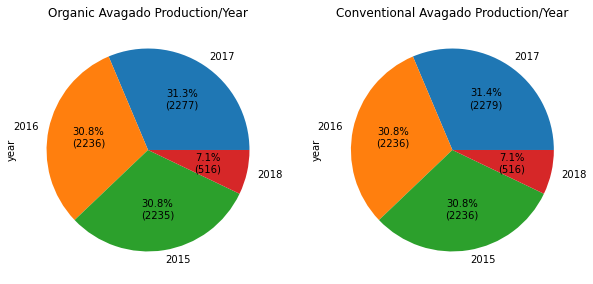

In [29]:
fig,ax=plt.subplots(1,2,figsize=(10,10))
x=df[df['type']=='organic']['year'].value_counts()
df[df['type']=='organic']['year'].value_counts().plot(kind='pie',autopct=lambda p:'{:.1f}%\n({:.0f})'.format(p,(p/100)*x.sum()),ax=ax[0],title=('Organic Avagado Production/Year'))


x=df[df['type']=='conventional']['year'].value_counts()
df[df['type']=='conventional']['year'].value_counts().plot(kind='pie',autopct=lambda p:'{:.1f}%\n({:.0f})'.format(p,(p/100)*x.sum()),ax=ax[1],title=('Conventional Avagado Production/Year'))

In [30]:
#get the list of columns in dataframe
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', 'Small Hass', 'Large Hass',
       'XLarge Hass', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags',
       'type', 'year', 'region'],
      dtype='object')

In [27]:
df.drop(['Date','Total Bags'],axis=1,inplace=True)

In [28]:
df

,AveragePrice,Total Volume,Small Hass,Large Hass,XLarge Hass,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,1.71,13888.04,1191.70,3431.50,0.00,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,1.87,13766.76,1191.92,2452.79,727.94,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,1.93,16205.22,1527.63,2981.04,727.01,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


<AxesSubplot:>

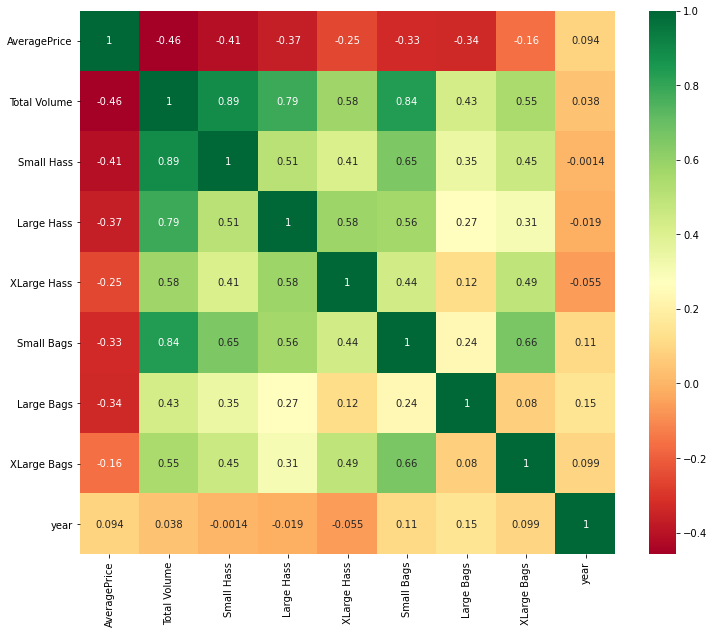

In [33]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='RdYlGn',annot=True)

In [29]:
#its the same for all, so it will not improve model. 
df.drop(['Total Volume'],axis=1,inplace=True)

In [30]:
df

,AveragePrice,Small Hass,Large Hass,XLarge Hass,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,2046.96,1529.20,0.00,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,1.71,1191.70,3431.50,0.00,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,1.87,1191.92,2452.79,727.94,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,1.93,1527.63,2981.04,727.01,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [31]:
#lets change the categorical data into numerical data
df=pd.get_dummies(df,drop_first=True)

In [32]:
df

,AveragePrice,Small Hass,Large Hass,XLarge Hass,Small Bags,Large Bags,XLarge Bags,year,type_organic,region_Atlanta,...,region_Roanoke,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_WestTexNewMexico
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,2015,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,2015,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,2015,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,2015,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,2015,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,2046.96,1529.20,0.00,13066.82,431.85,0.0,2018,1,0,...,0,0,0,0,0,0,0,0,0,1
18245,1.71,1191.70,3431.50,0.00,8940.04,324.80,0.0,2018,1,0,...,0,0,0,0,0,0,0,0,0,1
18246,1.87,1191.92,2452.79,727.94,9351.80,42.31,0.0,2018,1,0,...,0,0,0,0,0,0,0,0,0,1
18247,1.93,1527.63,2981.04,727.01,10919.54,50.00,0.0,2018,1,0,...,0,0,0,0,0,0,0,0,0,1


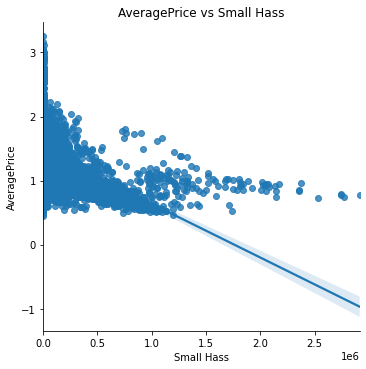

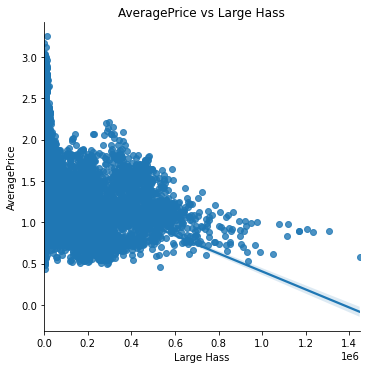

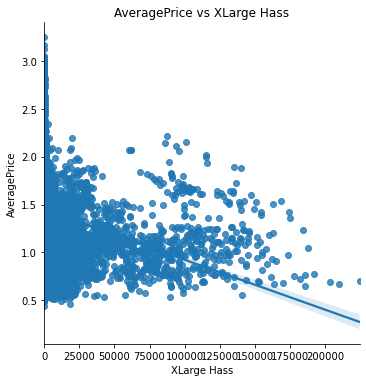

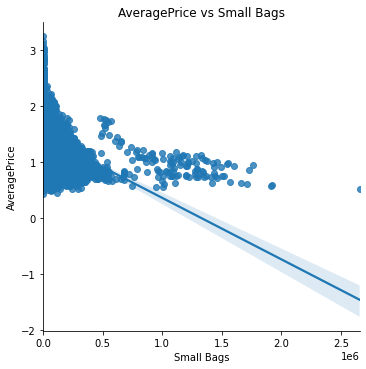

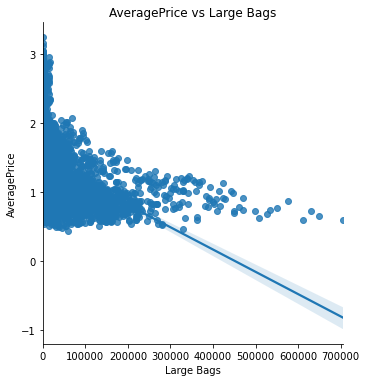

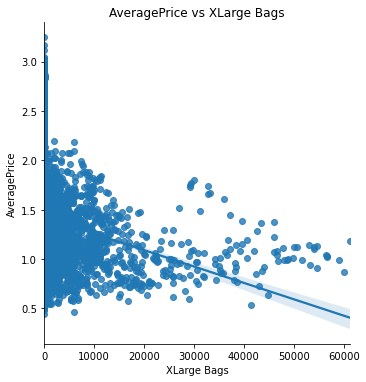

In [33]:
#checking the relationship between average price and feature columns
cols=['Small Hass','Large Hass','XLarge Hass','Small Bags','Large Bags','XLarge Bags']
for i in list(cols):
    sns.lmplot(y='AveragePrice',x=i,data=df,height=5,aspect=1)
    plt.title("%s vs %s" %('AveragePrice', i))

In [34]:
df=df.loc[:,~(df.columns.duplicated())]

In [35]:
#Lets split the columns into target and features
#Features
X=df.drop(['AveragePrice'],axis=1)

In [36]:
X

,Small Hass,Large Hass,XLarge Hass,Small Bags,Large Bags,XLarge Bags,year,type_organic,region_Atlanta,region_BaltimoreWashington,...,region_Roanoke,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_WestTexNewMexico
0,1036.74,54454.85,48.16,8603.62,93.25,0.0,2015,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,674.28,44638.81,58.33,9408.07,97.49,0.0,2015,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,794.70,109149.67,130.50,8042.21,103.14,0.0,2015,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1132.00,71976.41,72.58,5677.40,133.76,0.0,2015,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,941.48,43838.39,75.78,5986.26,197.69,0.0,2015,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2046.96,1529.20,0.00,13066.82,431.85,0.0,2018,1,0,0,...,0,0,0,0,0,0,0,0,0,1
18245,1191.70,3431.50,0.00,8940.04,324.80,0.0,2018,1,0,0,...,0,0,0,0,0,0,0,0,0,1
18246,1191.92,2452.79,727.94,9351.80,42.31,0.0,2018,1,0,0,...,0,0,0,0,0,0,0,0,0,1
18247,1527.63,2981.04,727.01,10919.54,50.00,0.0,2018,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [37]:
#target
y=df['AveragePrice']

In [38]:
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 14531, dtype: float64

In [39]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [40]:
print(selection.feature_importances_)

[0.0797262  0.05437104 0.0199496  0.066358   0.099945   0.00947858
 0.06679079 0.36148505 0.00242241 0.00412981 0.00683873 0.00322034
 0.00533035 0.00515038 0.00316806 0.00396486 0.0031528  0.00900767
 0.00275267 0.00182428 0.00448286 0.00252643 0.02461822 0.01144714
 0.00301012 0.00251259 0.0044571  0.00216088 0.00475187 0.00554002
 0.0044619  0.00373378 0.00135102 0.00252375 0.00573509 0.0116088
 0.00519247 0.00847129 0.00432246 0.00222957 0.00414406 0.00756878
 0.00421957 0.0258471  0.01149394 0.00645169 0.00373059 0.00358301
 0.00311336 0.0056439 ]


<AxesSubplot:>

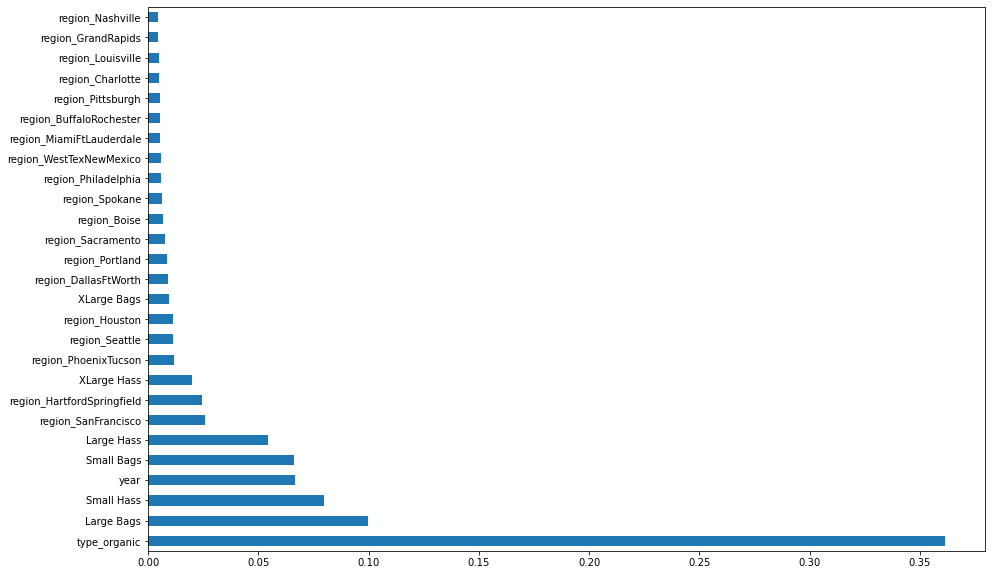

In [41]:
plt.figure(figsize=(15,10))
feature_imp=pd.Series(selection.feature_importances_, index=X.columns)
feature_imp.nlargest(27).plot(kind='barh')

# Train Test Split

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [43]:
#applying standard scaler
s=StandardScaler()
X_train=s.fit_transform(X_train)
X_test=s.transform(X_test)

In [44]:
#defining a function  to create the model  and printing cv score for each
algo=[]
value=[]
def cross_val_score_model(model,name):
    cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=10)
    cv_score=cross_val_score(model,X,y,cv=cv).mean()
    print('CV_Score' + ' '+ str(name) +': '+ str(cv_score))
    algo.append(name)
    value.append(cv_score)
cross_val_score_model(SVR(),'SVR')
cross_val_score_model(RandomForestRegressor(),'RandomForestRegressor')
cross_val_score_model(XGBRegressor(),'XGBRegressor')
cross_val_score_model(LinearRegression(),'LinearRegression')

CV_Score SVR: 0.4734080915701927
CV_Score RandomForestRegressor: 0.85618558729395
CV_Score XGBRegressor: 0.8404929885723493
CV_Score LinearRegression: 0.548018497344113


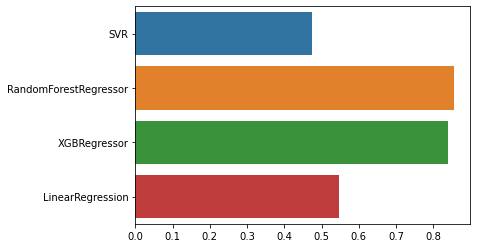

In [45]:
sns.barplot(x=value,y=algo)
plt.show()

# Hyper parameter Tuning

In [51]:
model_params={
    'RandomForestRegressor':{
        'model':RandomForestRegressor(),
        'params':{
            'n_estimators' :[100,300,500,800,1000, 1200],
            'max_features' : ['auto', 'sqrt'],
            'max_depth' : [5,10,15,20,25,30,35,40,45,50]
        }
    },
    'XGBRegressor':{
        'model':XGBRegressor(),
        'params':{
            'n_estimators' : [100, 500, 1000, 1300, 1500],
            'max_depth' : [2, 3, 5, 10, 15],
            'booster':['gbtree','gblinear'],
            'learning_rate':[0.05,0.1,0.15,0.20],
            'min_child_weight':[1,2,3,4],
            'base_score':[0.25,0.5,0.75,1]
        }
    }

}

In [52]:
scores=[]
cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=10)
for model_name, mp in model_params.items():
    random_clf=RandomizedSearchCV(mp['model'],mp['params'],scoring='neg_mean_squared_error', n_iter = 10, cv = cv, verbose=2, n_jobs = 1, return_train_score=False)
    random_clf.fit(X,y)
    scores.append({
        'model':model_name,
        'best_score':random_clf.best_score_,
        'best param':random_clf.best_params_,
        'best estimator':random_clf.best_estimator_
    })

ds=pd.DataFrame(scores,columns=['model','best param'])
ds

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ..max_depth=35, max_features=sqrt, n_estimators=300; total time=  14.9s
[CV] END ..max_depth=35, max_features=sqrt, n_estimators=300; total time=  15.0s
[CV] END ..max_depth=35, max_features=sqrt, n_estimators=300; total time=  16.0s
[CV] END ..max_depth=35, max_features=sqrt, n_estimators=300; total time=  15.7s
[CV] END ..max_depth=35, max_features=sqrt, n_estimators=300; total time=  15.7s
[CV] END ...max_depth=5, max_features=auto, n_estimators=800; total time=  48.3s
[CV] END ...max_depth=5, max_features=auto, n_estimators=800; total time=  46.2s
[CV] END ...max_depth=5, max_features=auto, n_estimators=800; total time=  40.9s
[CV] END ...max_depth=5, max_features=auto, n_estimators=800; total time=  43.4s
[CV] END ...max_depth=5, max_features=auto, n_estimators=800; total time=  43.8s
[CV] END ..max_depth=50, max_features=sqrt, n_estimators=100; total time=   4.8s
[CV] END ..max_depth=50, max_features=sqrt, n_es

,model,best param
0,RandomForestRegressor,"{'n_estimators': 100, 'max_features': 'sqrt', ..."
1,XGBRegressor,"{'n_estimators': 1300, 'min_child_weight': 3, ..."


In [53]:
def display_text_max_col_width(df, width):
    with pd.option_context('display.max_colwidth', width):
        print(df)

display_text_max_col_width(ds['best param'], 800)

0                                                                {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 50}
1    {'n_estimators': 1300, 'min_child_weight': 3, 'max_depth': 15, 'learning_rate': 0.1, 'booster': 'gbtree', 'base_score': 1}
Name: best param, dtype: object


In [54]:
cross_val_score_model(RandomForestRegressor(n_estimators=100, max_features='sqrt', max_depth=45),'RandomForestRegressor_best')
cross_val_score_model(XGBRegressor(n_estimators= 1500, min_child_weight= 3, max_depth=10, learning_rate=0.1, booster='gbtree', base_score=0.25),'XGBRegressor_best')

CV_Score RandomForestRegressor_best: 0.8583840160110586
CV_Score XGBRegressor_best: 0.872511427744986


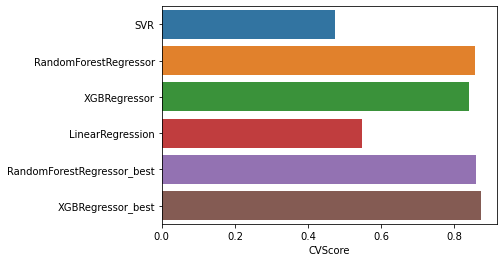

In [55]:
#visualizing the cv score for all the models
sns.barplot(x=value,y=algo)
plt.xlabel('CVScore')
plt.show()

In [ ]:
its maximum for xgb regressor with best parameters which is 0.872511427744986

In [47]:
from sklearn.metrics import r2_score
xgb=XGBRegressor()
xgb.fit(X_train,y_train)
xgb_y_pred=xgb.predict(X_test)
score=r2_score(y_test,xgb_y_pred)
#accuracy_score=accuracy_score(y_test,xgb_y_pred)
print("r2 score=",score)
#print("Accuracy score=",accuracy_score)

r2 score= 0.8360233953228147


In [49]:
from sklearn.metrics import r2_score
xgb_best=XGBRegressor(n_estimators= 1500, min_child_weight= 3, max_depth=10, learning_rate=0.1, booster='gbtree', base_score=0.25)
xgb_best.fit(X_train,y_train)
xgb_best_y_pred=xgb_best.predict(X_test)
score1=r2_score(y_test,xgb_best_y_pred)
#accuracy_score1=accuracy_score(y_test,xgb_best_y_pred)
print("r2 score=",score1)
#print("Accuracy score=",accuracy_score)

r2 score= 0.8672357668243927


<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

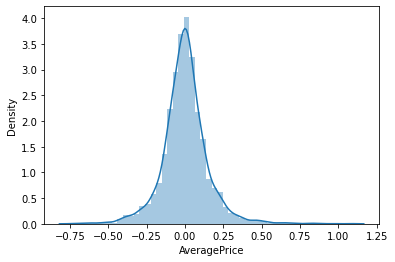

In [50]:
#lets visualize the difference between actual and predicted for XGB regressor with best params
sns.distplot(y_test-xgb_best_y_pred)

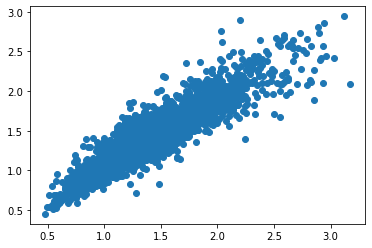

In [51]:
plt.scatter(y_test,xgb_best_y_pred)

In [52]:
df.reset_index()

,index,AveragePrice,Small Hass,Large Hass,XLarge Hass,Small Bags,Large Bags,XLarge Bags,year,type_organic,...,region_Roanoke,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_WestTexNewMexico
0,0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,2015,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,2015,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,2015,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,2015,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,2015,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14526,18244,1.63,2046.96,1529.20,0.00,13066.82,431.85,0.0,2018,1,...,0,0,0,0,0,0,0,0,0,1
14527,18245,1.71,1191.70,3431.50,0.00,8940.04,324.80,0.0,2018,1,...,0,0,0,0,0,0,0,0,0,1
14528,18246,1.87,1191.92,2452.79,727.94,9351.80,42.31,0.0,2018,1,...,0,0,0,0,0,0,0,0,0,1
14529,18247,1.93,1527.63,2981.04,727.01,10919.54,50.00,0.0,2018,1,...,0,0,0,0,0,0,0,0,0,1


# Lets predict the price of avacado

In [53]:
k=pd.DataFrame(df.loc[18244])
k

,18244
AveragePrice,1.63
Small Hass,2046.96
Large Hass,1529.20
XLarge Hass,0.00
Small Bags,13066.82
Large Bags,431.85
XLarge Bags,0.00
year,2018.00
type_organic,1.00
region_Atlanta,0.00


In [54]:
a=[[2046.96,1529.2,0,13066.82,431.85,0,2018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]]
a=s.transform(a)
b=xgb_best.predict(a)
b

array([1.6294155], dtype=float32)

# Model saving

In [56]:
import pickle
filename='Avacado Project'
pickle.dump(xgb_best,open(filename,'wb'))